# Tv data

In [1]:
library(readxl)

media_tv <- read_excel("Media_Data.xlsx", sheet=3)
head(media_tv)

Genre,Type,Week_number,Month,Date,Year,Brand,Start_Time,Length,GRP,Spends,Month_num
GENERAL ENTERTAINMENT,promotion,35,Aug,24-Aug,2020,B1,20:58:08,15,6,879.5024,8
GENERAL ENTERTAINMENT,promotion,36,Aug,31-Aug,2020,B1,20:57:48,15,6,879.5024,8
GENERAL ENTERTAINMENT,promotion,36,Aug,31-Aug,2020,B1,21:21:22,15,6,879.5024,8
GENERAL ENTERTAINMENT,promotion,36,Aug,31-Aug,2020,B1,21:37:21,15,6,879.5024,8
GENERAL ENTERTAINMENT,promotion,36,Aug,31-Aug,2020,B1,21:51:09,15,6,879.5024,8
GENERAL ENTERTAINMENT,promotion,36,Sep,1-Sep,2020,B1,20:00:18,15,6,1099.3133,9


In [2]:
unique(media_tv$Type)

[1] "promotion"   "regular"     "Regular"     "Sponsorship" "Promotion"

In [3]:
colSums(is.na(media_tv))

Genre        Type Week_number       Month        Date        Year 
          0           0           0        6278           0           0 
      Brand  Start_Time      Length         GRP      Spends   Month_num 
          0           0           0           0           0           0

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


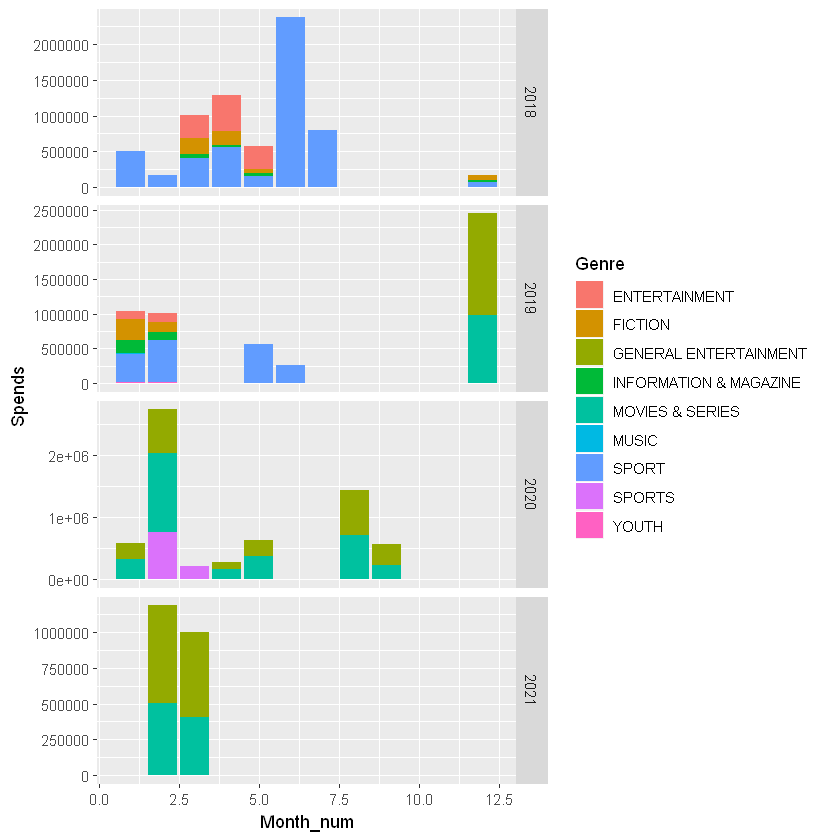

In [4]:
library(ggplot2)

f <- ggplot(data = media_tv, aes(x=Month_num, y=Spends, fill = Genre))

 f + geom_bar(stat = 'identity' ) + facet_grid(Year~., scales='free')

In [83]:
library(dplyr)
a2 <- media_tv %>%
  group_by(Year, Week_number, Type, Genre) %>%
  summarise(spends = sum(Spends, na.rm=TRUE), GRP = mean(GRP, na.rm=TRUE))


head(a2)

Year,Week_number,Type,Genre,spends,GRP
2018,1,Promotion,SPORT,67204.40,2.018332
2018,1,Regular,SPORT,41461.70,1.904309
2018,2,Promotion,SPORT,54446.95,2.011488
2018,2,Regular,SPORT,26653.95,1.966103
2018,3,Promotion,SPORT,99325.82,2.009898
2018,3,Regular,SPORT,34855.16,1.990886


In [84]:
dim(a2)

[1] 214   6

In [146]:
unique(a2$Year)

[1] 2018 2019 2020 2021

In [147]:
1:53

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53

In [154]:
# to impute values in 

for (j in unique(a2$Year)){
    a3 = subset(a2, a2$Year == j)
    
    for (i in 1:53){
        
        '%!in%' <- Negate('%in%')
        if (i %!in% unique(a3$Week_number)){
            a2[nrow(a2)+1,] = c(j, i, 0, 0, 0, 0 )
        }
    }
    
}


In [155]:
dim(a2)

[1] 344   6

In [156]:
tail(a2)

Year,Week_number,Type,Genre,spends,GRP
2021,48,0,0,0,0
2021,49,0,0,0,0
2021,50,0,0,0,0
2021,51,0,0,0,0
2021,52,0,0,0,0
2021,53,0,0,0,0


In [157]:

a3 <- a2[c('Year', 'Week_number', 'spends', 'GRP')]

a3['type'] <- tolower(a2$Type)
 
a3['genre'] <- tolower(a2$Genre)
a3$genre[a2$genre == 'sport'] <- 'sports'

head(a3)

Warning message:
"Unknown or uninitialised column: 'genre'."

Year,Week_number,spends,GRP,type,genre
2018,1,67204.40,2.018332,promotion,sport
2018,1,41461.70,1.904309,regular,sport
2018,2,54446.95,2.011488,promotion,sport
2018,2,26653.95,1.966103,regular,sport
2018,3,99325.82,2.009898,promotion,sport
2018,3,34855.16,1.990886,regular,sport


In [244]:
# verbose syntax
library(pivottabler)

pt_media_tv_2 <- PivotTable$new()
pt_media_tv_2$addData(a3) 

#pt_media_tv_2$addColumnDataGroups("type", addTotal=TRUE)
pt_media_tv_2$addColumnDataGroups("genre", addTotal=TRUE)

pt_media_tv_2$addRowDataGroups("Year", header='Year', addTotal=FALSE)
pt_media_tv_2$addRowDataGroups("Week_number", header='Week_number', addTotal=FALSE)

pt_media_tv_2$defineCalculation(calculationName="spends", summariseExpression="sum(spends)")
pt_media_tv_2$defineCalculation(calculationName="grp", summariseExpression="max(GRP)")

pt_media_tv_2$renderPivot(showRowGroupHeaders=TRUE)


HTML widgets cannot be represented in plain text (need html)

In [245]:
month_tv_2 <- pt_media_tv_2$asDataFrame(rowGroupsAsColumns = TRUE)
month_tv_2

,Year,Week_number,0 spends,0 grp,entertainment spends,entertainment grp,fiction spends,fiction grp,general entertainment spends,general entertainment grp,...,music spends,music grp,sport spends,sport grp,sports spends,sports grp,youth spends,youth grp,Total spends,Total grp
2018 1,2018,1,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,1.086661e+05,2.018332,NA,NA,NA,NA,1.086661e+05,2.018332
2018 2,2018,2,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,8.110090e+04,2.011488,NA,NA,NA,NA,8.110090e+04,2.011488
2018 3,2018,3,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,1.341810e+05,2.009898,NA,NA,NA,NA,1.341810e+05,2.009898
2018 4,2018,4,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,1.111720e+05,2.190275,NA,NA,NA,NA,1.111720e+05,2.190275
2018 5,2018,5,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,7.608905e+04,2.196819,NA,NA,NA,NA,7.608905e+04,2.196819
2018 6,2018,6,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,2.519869e+04,2.535882,NA,NA,NA,NA,2.519869e+04,2.535882
2018 7,2018,7,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,8.993019e+04,4.569968,NA,NA,NA,NA,8.993019e+04,4.569968
2018 8,2018,8,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,2.729865e+04,2.562677,NA,NA,NA,NA,2.729865e+04,2.562677
2018 9,2018,9,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,7.025753e+04,2.095989,NA,NA,NA,NA,7.039421e+04,2.095989
2018 10,2018,10,NA,NA,28779.17,11.235000,39345.374,8.385652,NA,NA,...,NA,NA,1.218002e+05,2.851252,NA,NA,NA,NA,2.009702e+05,11.235000


In [246]:
# Impute null values with 0

month_tv_2[is.na(month_tv_2)] <- 0

head(month_tv_2)

,Year,Week_number,0 spends,0 grp,entertainment spends,entertainment grp,fiction spends,fiction grp,general entertainment spends,general entertainment grp,...,music spends,music grp,sport spends,sport grp,sports spends,sports grp,youth spends,youth grp,Total spends,Total grp
2018 1,2018,1,0,0,0,0,0,0,0,0,...,0,0,108666.09,2.018332,0,0,0,0,108666.09,2.018332
2018 2,2018,2,0,0,0,0,0,0,0,0,...,0,0,81100.90,2.011488,0,0,0,0,81100.90,2.011488
2018 3,2018,3,0,0,0,0,0,0,0,0,...,0,0,134180.98,2.009898,0,0,0,0,134180.98,2.009898
2018 4,2018,4,0,0,0,0,0,0,0,0,...,0,0,111172.02,2.190275,0,0,0,0,111172.02,2.190275
2018 5,2018,5,0,0,0,0,0,0,0,0,...,0,0,76089.05,2.196819,0,0,0,0,76089.05,2.196819
2018 6,2018,6,0,0,0,0,0,0,0,0,...,0,0,25198.69,2.535882,0,0,0,0,25198.69,2.535882


In [247]:
dim(month_tv_2)

[1] 212  24

In [162]:
month_tv_2['as_grp'] <- 0
month_tv_2['as_spends'] <- 0

head(month_tv_2)

,Year,Week_number,0 spends,0 grp,entertainment spends,entertainment grp,fiction spends,fiction grp,general entertainment spends,general entertainment grp,...,sport spends,sport grp,sports spends,sports grp,youth spends,youth grp,Total spends,Total grp,as_grp,as_spends
2018 1,2018,1,0,0,0,0,0,0,0,0,...,108666.09,3.922640,0,0,0,0,108666.09,3.922640,0,0
2018 2,2018,2,0,0,0,0,0,0,0,0,...,81100.90,3.977591,0,0,0,0,81100.90,3.977591,0,0
2018 3,2018,3,0,0,0,0,0,0,0,0,...,134180.98,4.000784,0,0,0,0,134180.98,4.000784,0,0
2018 4,2018,4,0,0,0,0,0,0,0,0,...,111172.02,4.200372,0,0,0,0,111172.02,4.200372,0,0
2018 5,2018,5,0,0,0,0,0,0,0,0,...,76089.05,4.339002,0,0,0,0,76089.05,4.339002,0,0
2018 6,2018,6,0,0,0,0,0,0,0,0,...,25198.69,4.728584,0,0,0,0,25198.69,4.728584,0,0


In [163]:
month_tv_2$as_grp[1]

[1] 0

In [164]:
# removing spaces in column names
library(stringr)

names(month_tv_2)<-str_replace_all(names(month_tv_2), c(" " = "_"))

head(month_tv_2)

,Year,Week_number,0_spends,0_grp,entertainment_spends,entertainment_grp,fiction_spends,fiction_grp,general_entertainment_spends,general_entertainment_grp,...,sport_spends,sport_grp,sports_spends,sports_grp,youth_spends,youth_grp,Total_spends,Total_grp,as_grp,as_spends
2018 1,2018,1,0,0,0,0,0,0,0,0,...,108666.09,3.922640,0,0,0,0,108666.09,3.922640,0,0
2018 2,2018,2,0,0,0,0,0,0,0,0,...,81100.90,3.977591,0,0,0,0,81100.90,3.977591,0,0
2018 3,2018,3,0,0,0,0,0,0,0,0,...,134180.98,4.000784,0,0,0,0,134180.98,4.000784,0,0
2018 4,2018,4,0,0,0,0,0,0,0,0,...,111172.02,4.200372,0,0,0,0,111172.02,4.200372,0,0
2018 5,2018,5,0,0,0,0,0,0,0,0,...,76089.05,4.339002,0,0,0,0,76089.05,4.339002,0,0
2018 6,2018,6,0,0,0,0,0,0,0,0,...,25198.69,4.728584,0,0,0,0,25198.69,4.728584,0,0


# adstock weekly

In [241]:
for (i in 1:nrow(month_tv_2)){
    
    if (i ==1){
        month_tv_2$as_grp[i] = month_tv_2$Total_grp[i]
    } else if (i ==2) {
       month_tv_2$as_grp[i] = month_tv_2$Total_grp[i] + month_tv_2$Total_grp[i-1]* (0.5)**(2/(i-1))
    } else if (i ==3) {
       month_tv_2$as_grp[i] = month_tv_2$Total_grp[i] + month_tv_2$Total_grp[i-1]* (0.5)**(2/(i-1)) + month_tv_2$Total_grp[i-2]* (0.5)**(2*2/(i-1))
    } else {
       month_tv_2$as_grp[i] = month_tv_2$Total_grp[i] + month_tv_2$Total_grp[i-1]* (0.5)**(2/(i-1)) + month_tv_2$Total_grp[i-2]* (0.5)**(2*2/(i-1)) 
                              + month_tv_2$Total_grp[i-3]* (0.5)**(2*3/(i-1)) + month_tv_2$Total_grp[i-3]* (0.5)**(2*4/(i-1))
    }

}

In [242]:
for (i in 1:nrow(month_tv_2)){
    
    if (i ==1){
        month_tv_2$as_spends[i] = month_tv_2$Total_spends[i]
    } else if (i ==2) {
       month_tv_2$as_spends[i] = month_tv_2$Total_spends[i] + month_tv_2$Total_spends[i-1]* (0.5)**(2/(i-1))
    } else if (i ==3) {
       month_tv_2$as_spends[i] = month_tv_2$Total_spends[i] + month_tv_2$Total_spends[i-1]* (0.5)**(2/(i-1)) + month_tv_2$Total_spends[i-2]* (0.5)**(2*2/(i-1))
    } else {
       month_tv_2$as_spends[i] = month_tv_2$Total_spends[i] + month_tv_2$Total_spends[i-1]* (0.5)**(2/(i-1)) + month_tv_2$Total_spends[i-2]* (0.5)**(2*2/(i-1)) 
                              + month_tv_2$Total_spends[i-3]* (0.5)**(2*3/(i-1)) + month_tv_2$Total_spends[i-3]* (0.5)**(2*4/(i-1))
    }

}

In [243]:
head(month_tv_2)

,Year,Week_number,0_spends,0_grp,entertainment_spends,entertainment_grp,fiction_spends,fiction_grp,general_entertainment_spends,general_entertainment_grp,...,sport_spends,sport_grp,sports_spends,sports_grp,youth_spends,youth_grp,Total_spends,Total_grp,as_grp,as_spends
2018 1,2018,1,0,0,0,0,0,0,0,0,...,108666.09,3.922640,0,0,0,0,108666.09,3.922640,3.922640,108666.1
2018 2,2018,2,0,0,0,0,0,0,0,0,...,81100.90,3.977591,0,0,0,0,81100.90,3.977591,4.958251,108267.4
2018 3,2018,3,0,0,0,0,0,0,0,0,...,134180.98,4.000784,0,0,0,0,134180.98,4.000784,6.970239,201898.0
2018 4,2018,4,0,0,0,0,0,0,0,0,...,111172.02,4.200372,0,0,0,0,111172.02,4.200372,8.299215,227885.7
2018 5,2018,5,0,0,0,0,0,0,0,0,...,76089.05,4.339002,0,0,0,0,76089.05,4.339002,9.309506,221790.0
2018 6,2018,6,0,0,0,0,0,0,0,0,...,25198.69,4.728584,0,0,0,0,25198.69,4.728584,10.429413,146715.0


In [172]:
month_tv_2

,Year,Week_number,0_spends,0_grp,entertainment_spends,entertainment_grp,fiction_spends,fiction_grp,general_entertainment_spends,general_entertainment_grp,...,sport_spends,sport_grp,sports_spends,sports_grp,youth_spends,youth_grp,Total_spends,Total_grp,as_grp,as_spends
2018 1,2018,1,0,0,0.00,0.000000,0.000,0.000000,0,0,...,1.086661e+05,3.922640,0,0,0.0000,0,1.086661e+05,3.922640,3.922640,108666.09
2018 2,2018,2,0,0,0.00,0.000000,0.000,0.000000,0,0,...,8.110090e+04,3.977591,0,0,0.0000,0,8.110090e+04,3.977591,9.525042,234777.96
2018 3,2018,3,0,0,0.00,0.000000,0.000,0.000000,0,0,...,1.341810e+05,4.000784,0,0,0.0000,0,1.341810e+05,4.000784,22.768423,607913.97
2018 4,2018,4,0,0,0.00,0.000000,0.000,0.000000,0,0,...,1.111720e+05,4.200372,0,0,0.0000,0,1.111720e+05,4.200372,24.307828,609626.46
2018 5,2018,5,0,0,0.00,0.000000,0.000,0.000000,0,0,...,7.608905e+04,4.339002,0,0,0.0000,0,7.608905e+04,4.339002,25.583812,736896.09
2018 6,2018,6,0,0,0.00,0.000000,0.000,0.000000,0,0,...,2.519869e+04,4.728584,0,0,0.0000,0,2.519869e+04,4.728584,27.428231,556945.99
2018 7,2018,7,0,0,0.00,0.000000,0.000,0.000000,0,0,...,8.993019e+04,7.917483,0,0,0.0000,0,8.993019e+04,7.917483,32.202813,411238.88
2018 8,2018,8,0,0,0.00,0.000000,0.000,0.000000,0,0,...,2.729865e+04,5.098559,0,0,0.0000,0,2.729865e+04,5.098559,36.963811,284660.54
2018 9,2018,9,0,0,0.00,0.000000,0.000,0.000000,0,0,...,7.025753e+04,2.095989,0,0,0.0000,0,7.039421e+04,2.095989,40.859633,454000.84
2018 10,2018,10,0,0,28779.17,11.235000,39345.374,8.385652,0,0,...,1.218002e+05,2.851252,0,0,0.0000,0,2.009702e+05,23.593905,46.533654,434212.64


In [5]:
library(dplyr)
a <- media_tv %>%
  group_by(Year, Month_num, Type, Genre) %>%
  summarise(spends = sum(Spends, na.rm=TRUE), GRP = mean(GRP, na.rm=TRUE))


head(a)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Year,Month_num,Type,Genre,spends,GRP
2018,1,Promotion,SPORT,365409.670,2.085064
2018,1,Regular,SPORT,143749.066,1.989611
2018,2,Promotion,SPORT,1366.869,1.634233
2018,2,Regular,SPORT,144208.106,2.537908
2018,2,Sponsorship,SPORT,21734.585,4.061446
2018,3,Regular,ENTERTAINMENT,323410.090,11.693684


In [6]:
dim(a)

[1] 76  6

In [7]:
unique(a$Genre)

[1] "SPORT"                  "ENTERTAINMENT"          "FICTION"               
[4] "INFORMATION & MAGAZINE" "MUSIC"                  "YOUTH"                 
[7] "GENERAL ENTERTAINMENT"  "MOVIES & SERIES"        "SPORTS"

In [174]:
# to impute values in 

for (j in unique(a$Year)){
    a4 = subset(a, a$Year == j)
    
    for (i in 1:12){
        
        '%!in%' <- Negate('%in%')
        if (i %!in% unique(a4$Year)){
            a[nrow(a)+1,] = c(j, i, 0, 0, 0, 0 )
        }
    }
    
}


In [175]:

a_new <- a[c('Year', 'Month_num', 'spends', 'GRP')]

a_new['type'] <- tolower(a$Type)
 
a_new['genre'] <- tolower(a$Genre)
a_new$genre[a_new$genre == 'sport'] <- 'sports'

head(a_new)

Year,Month_num,spends,GRP,type,genre
2018,1,365409.670,2.085064,promotion,sports
2018,1,143749.066,1.989611,regular,sports
2018,2,1366.869,1.634233,promotion,sports
2018,2,144208.106,2.537908,regular,sports
2018,2,21734.585,4.061446,sponsorship,sports
2018,3,323410.090,11.693684,regular,entertainment


In [176]:
dim(a_new)

[1] 124   6

In [10]:
unique(a_new$type)

[1] "promotion"   "regular"     "sponsorship"

In [11]:
unique(a_new$genre)

[1] "sports"                 "entertainment"          "fiction"               
[4] "information & magazine" "music"                  "youth"                 
[7] "general entertainment"  "movies & series"

library(tidyverse)

a_new %>%
  pivot_wider(
    names_from = c(type, genre),
    values_from = c(spends, GRP)
  )

library(tidyverse)

media_tv %>% 
  dplyr::group_by(Year, Month_num, Type, Genre, .drop = FALSE) %>% 
  dplyr::summarise(spends = sum(Spends, na.rm=TRUE), GRP = mean(GRP, na.rm=TRUE)) %>% 
  tidyr::pivot_wider(names_from = c(Type, Genre),
    values_from = c(spends, GRP)) %>% 
  dplyr::select(!contains("NA"))

In [221]:
# verbose syntax
library(pivottabler)

pt_media_tv <- PivotTable$new()
pt_media_tv$addData(a_new) 

pt_media_tv$addColumnDataGroups("type", addTotal=TRUE)
pt_media_tv$addColumnDataGroups("genre", addTotal=TRUE)

pt_media_tv$addRowDataGroups("Year", header='Year', addTotal=FALSE)
pt_media_tv$addRowDataGroups("Month_num", header='Month', addTotal=FALSE)

pt_media_tv$defineCalculation(calculationName="spends", summariseExpression="sum(spends)")
pt_media_tv$defineCalculation(calculationName="grp", summariseExpression="max(GRP)")

pt_media_tv$renderPivot(showRowGroupHeaders=TRUE)


HTML widgets cannot be represented in plain text (need html)

In [222]:
month_tv <- pt_media_tv$asDataFrame(rowGroupsAsColumns = TRUE)
month_tv

,Year,Month,0 0 spends,0 0 grp,0 Total spends,0 Total grp,promotion general entertainment spends,promotion general entertainment grp,promotion movies & series spends,promotion movies & series grp,...,sponsorship music spends,sponsorship music grp,sponsorship sports spends,sponsorship sports grp,sponsorship youth spends,sponsorship youth grp,sponsorship Total spends,sponsorship Total grp,Total spends,Total grp
2018 1,2018,1,0,0,0,0,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,509158.736,2.085064
2018 2,2018,2,0,0,0,0,NA,NA,NA,NA,...,NA,NA,21734.5854,4.0614462,NA,NA,21734.5854,4.061446,167309.561,4.061446
2018 3,2018,3,0,0,0,0,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,1015164.008,11.693684
2018 4,2018,4,0,0,0,0,NA,NA,NA,NA,...,NA,NA,12922.5236,4.5355544,407.9258,0,258987.0941,17.073947,1289587.985,18.088966
2018 5,2018,5,0,0,0,0,NA,NA,NA,NA,...,NA,NA,399.1258,2.5358824,NA,NA,268003.1073,14.570217,577394.756,23.046000
2018 6,2018,6,0,0,0,0,NA,NA,NA,NA,...,NA,NA,1001.2316,3.5648147,NA,NA,1001.2316,3.564815,2379346.572,11.389557
2018 7,2018,7,0,0,0,0,NA,NA,NA,NA,...,NA,NA,1278.2504,3.9884928,NA,NA,1278.2504,3.988493,801170.042,12.293317
2018 8,2018,8,0,0,0,0,NA,NA,NA,NA,...,NA,NA,513.0315,6.6516118,NA,NA,513.0315,6.651612,1879.901,6.651612
2018 9,2018,9,0,0,0,0,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.000,0.000000
2018 10,2018,10,0,0,0,0,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,0.000,0.000000


In [223]:
dim(month_tv)

[1] 48 48

In [230]:
# Impute null values with 0

month_tv[is.na(month_tv)] <- 0


In [231]:
# creating new columns
month_tv['as_grp'] <- 0
month_tv['as_spends'] <- 0

head(month_tv)

,Year,Month,0_0_spends,0_0_grp,0_Total_spends,0_Total_grp,promotion_general_entertainment_spends,promotion_general_entertainment_grp,promotion_movies_&_series_spends,promotion_movies_&_series_grp,...,sponsorship_sports_spends,sponsorship_sports_grp,sponsorship_youth_spends,sponsorship_youth_grp,sponsorship_Total_spends,sponsorship_Total_grp,Total_spends,Total_grp,as_grp,as_spends
2018 1,2018,1,0,0,0,0,0,0,0,0,...,0.0000,0.000000,0.0000,0,0.000,0.000000,509158.7,2.085064,0,0
2018 2,2018,2,0,0,0,0,0,0,0,0,...,21734.5854,4.061446,0.0000,0,21734.585,4.061446,167309.6,4.061446,0,0
2018 3,2018,3,0,0,0,0,0,0,0,0,...,0.0000,0.000000,0.0000,0,0.000,0.000000,1015164.0,11.693684,0,0
2018 4,2018,4,0,0,0,0,0,0,0,0,...,12922.5236,4.535554,407.9258,0,258987.094,17.073947,1289588.0,18.088966,0,0
2018 5,2018,5,0,0,0,0,0,0,0,0,...,399.1258,2.535882,0.0000,0,268003.107,14.570217,577394.8,23.046000,0,0
2018 6,2018,6,0,0,0,0,0,0,0,0,...,1001.2316,3.564815,0.0000,0,1001.232,3.564815,2379346.6,11.389557,0,0


In [232]:
# removing spaces in column names
library(stringr)

names(month_tv)<-str_replace_all(names(month_tv), c("  " = "_", " "="_"))

head(month_tv)

,Year,Month,0_0_spends,0_0_grp,0_Total_spends,0_Total_grp,promotion_general_entertainment_spends,promotion_general_entertainment_grp,promotion_movies_&_series_spends,promotion_movies_&_series_grp,...,sponsorship_sports_spends,sponsorship_sports_grp,sponsorship_youth_spends,sponsorship_youth_grp,sponsorship_Total_spends,sponsorship_Total_grp,Total_spends,Total_grp,as_grp,as_spends
2018 1,2018,1,0,0,0,0,0,0,0,0,...,0.0000,0.000000,0.0000,0,0.000,0.000000,509158.7,2.085064,0,0
2018 2,2018,2,0,0,0,0,0,0,0,0,...,21734.5854,4.061446,0.0000,0,21734.585,4.061446,167309.6,4.061446,0,0
2018 3,2018,3,0,0,0,0,0,0,0,0,...,0.0000,0.000000,0.0000,0,0.000,0.000000,1015164.0,11.693684,0,0
2018 4,2018,4,0,0,0,0,0,0,0,0,...,12922.5236,4.535554,407.9258,0,258987.094,17.073947,1289588.0,18.088966,0,0
2018 5,2018,5,0,0,0,0,0,0,0,0,...,399.1258,2.535882,0.0000,0,268003.107,14.570217,577394.8,23.046000,0,0
2018 6,2018,6,0,0,0,0,0,0,0,0,...,1001.2316,3.564815,0.0000,0,1001.232,3.564815,2379346.6,11.389557,0,0


In [250]:
for (i in 1:nrow(month_tv)){
    
    if (i ==1){
        month_tv$as_grp[i] = month_tv$Total_grp[i]
    } else if (i ==2) {
       month_tv$as_grp[i] = month_tv$Total_grp[i] + month_tv$Total_grp[i-1]* (0.5)**(2/(i*4-1))
    } else if (i ==3) {
       month_tv$as_grp[i] = month_tv$Total_grp[i] + month_tv$Total_grp[i-1]* (0.5)**(2/(i*4-1)) + month_tv$Total_grp[i-2]* (0.5)**(2*2/(i*4-2))
    } else {
       month_tv$as_grp[i] = month_tv$Total_grp[i] + month_tv$Total_grp[i-1]* (0.5)**(2/(i*4-1)) + month_tv$Total_grp[i-2]* (0.5)**(2*2/(i*4-2)) 
                              + month_tv$Total_grp[i-3]* (0.5)**(2*3/(i*4-3)) + month_tv$Total_grp[i*4-3]* (0.5)**(2*4/(i*4-4))
    }

}

In [251]:
for (i in 1:nrow(month_tv)){
    
    if (i ==1){
        month_tv$as_spends[i] = month_tv$Total_spends[i]
    } else if (i ==2) {
       month_tv$as_spends[i] = month_tv$Total_spends[i] + month_tv$Total_spends[i-1]* (0.5)**(2/(i*4-1))
    } else if (i ==3) {
       month_tv$as_spends[i] = month_tv$Total_spends[i] + month_tv$Total_spends[i-1]* (0.5)**(2/(i*4-1)) + month_tv$Total_spends[i-2]* (0.5)**(2*2/(i*4-2))
    } else {
       month_tv$as_spends[i] = month_tv$Total_spends[i] + month_tv$Total_spends[i-1]* (0.5)**(2/(i*4-1)) + month_tv$Total_spends[i-2]* (0.5)**(2*2/(i*4-2)) 
                              + month_tv$Total_spends[i-3]* (0.5)**(2*3/(i*4-3)) + month_tv$Total_spends[i*4-3]* (0.5)**(2*4/(i*4-4))
    }

}

In [252]:
head(month_tv)

,Year,Month,0_0_spends,0_0_grp,0_Total_spends,0_Total_grp,promotion_general_entertainment_spends,promotion_general_entertainment_grp,promotion_movies_&_series_spends,promotion_movies_&_series_grp,...,sponsorship_sports_spends,sponsorship_sports_grp,sponsorship_youth_spends,sponsorship_youth_grp,sponsorship_Total_spends,sponsorship_Total_grp,Total_spends,Total_grp,as_grp,as_spends
2018 1,2018,1,0,0,0,0,0,0,0,0,...,0.0000,0.000000,0.0000,0,0.000,0.000000,509158.7,2.085064,2.085064,509158.7
2018 2,2018,2,0,0,0,0,0,0,0,0,...,21734.5854,4.061446,0.0000,0,21734.585,4.061446,167309.6,4.061446,5.771898,584990.5
2018 3,2018,3,0,0,0,0,0,0,0,0,...,0.0000,0.000000,0.0000,0,0.000,0.000000,1015164.0,11.693684,16.854402,1548532.8
2018 4,2018,4,0,0,0,0,0,0,0,0,...,12922.5236,4.535554,407.9258,0,258987.094,17.073947,1289588.0,18.088966,32.082108,2352385.8
2018 5,2018,5,0,0,0,0,0,0,0,0,...,399.1258,2.535882,0.0000,0,268003.107,14.570217,577394.8,23.046000,49.886482,2646484.6
2018 6,2018,6,0,0,0,0,0,0,0,0,...,1001.2316,3.564815,0.0000,0,1001.232,3.564815,2379346.6,11.389557,49.034597,4059857.2


# Digital Media Data

In [16]:
dig_media <- read_excel("Media_Data.xlsx", sheet=2)
head(dig_media)

Date,Month,Year,Week,Edit_size,Type,Platform,Brand,Impressions,Views,Completed_Views,Engagement,Spends,Clicks,Campaign_Objective
2018-02-17,2,2018,7,10s,Top Snap Only,SnapChat,B1,2157384,474414,102222,0,2808.57,0,Promotion
2018-03-02,3,2018,9,15,Video,facebook,B1,354447,136986,19992,137433,260.13,0,Promotion
2018-03-02,3,2018,9,15,Video,instagram,B1,104661,26463,4245,26787,54.96,0,Promotion
2018-03-04,3,2018,10,15.7,Video,shahid.mbc.net,B1,243624,243465,229281,1752,14252.00,0,Promotion
2018-03-04,3,2018,10,15.7,Video,shahid.mbc.net,B1,239280,239097,226212,1596,13997.88,0,Promotion
2018-03-04,3,2018,10,15.72,Video,TubeMogul MENA,B1,113451,113067,32979,2091,2638.32,0,Promotion


In [17]:
colSums(is.na(dig_media))

Date              Month               Year               Week 
                 0                  0                  0                  0 
         Edit_size               Type           Platform              Brand 
              4741               3651                  0                  0 
       Impressions              Views    Completed_Views         Engagement 
                 0                  0                  0                  0 
            Spends             Clicks Campaign_Objective 
                 0                 50                  0

In [18]:
dig_media_1 = dig_media

dig_2 = subset(dig_media, is.na(dig_media_1$Type))

head(dig_2)

Date,Month,Year,Week,Edit_size,Type,Platform,Brand,Impressions,Views,Completed_Views,Engagement,Spends,Clicks,Campaign_Objective
2019-12-03,12,2019,49,NA,NA,Twitter,B1,4812720,1161345,821703,46929,10275.15,0,Promotion
2019-12-03,12,2019,49,NA,NA,facebook,B1,2675304,122784,47901,123570,1306.95,0,Promotion
2019-12-03,12,2019,49,NA,NA,facebook,B1,480411,43440,16080,43914,239.13,0,Promotion
2019-12-10,12,2019,50,NA,NA,SnapChat,B1,17519319,3025503,962055,0,33000.00,0,Promotion
2019-12-10,12,2019,50,NA,NA,SnapChat,B1,12689325,547476,187113,0,33000.00,0,Promotion
2019-12-10,12,2019,50,NA,NA,SnapChat,B1,16470159,2042961,551511,0,33000.00,0,Promotion


In [19]:
table(dig_2$Platform)


              facebook   Programmatic/Adintop      Programmatic/Blis 
                   123                   2184                    130 
      Programmatic/DMS       Programmatic/MMP Programmatic/Video OPX 
                   979                    140                     82 
              SnapChat                Twitter 
                     8                      5 

In [20]:
table(dig_2$Year)


2019 
3651 

In [21]:
table(dig_media$Year)


 2018  2019  2020  2021 
  332  5892 18493  6676 

In [22]:
dig_3 = subset(dig_media_1, dig_media_1$Type == "Youtube")

head(dig_3)

Date,Month,Year,Week,Edit_size,Type,Platform,Brand,Impressions,Views,Completed_Views,Engagement,Spends,Clicks,Campaign_Objective
2020-01-21,1,2020,4,-,Youtube,Youtube,B1,46719,17832,17097,0,259.5819,78,Awareness
2020-01-21,1,2020,4,-,Youtube,Youtube,B1,35511,14496,14049,0,209.9599,48,Awareness
2020-01-21,1,2020,4,-,Youtube,Youtube,B1,16104,4914,4611,0,74.5603,36,Awareness
2020-01-22,1,2020,4,-,Youtube,Youtube,B1,1108977,316818,304068,0,3414.8890,2112,Awareness
2020-01-22,1,2020,4,6.06,Youtube,Youtube,B1,1246467,1246467,1101453,0,2612.2867,4170,Awareness
2020-01-22,1,2020,4,-,Youtube,Youtube,B1,593793,180525,174408,0,2405.4221,1101,Awareness


In [23]:
table(dig_3$Year)


2020 2021 
4269 1132 

In [24]:
table(dig_3$Platform)


Youtube 
   5401 

In [25]:
dig_4 = subset(dig_media_1, dig_media_1$Year == 2020)

head(dig_4)

Date,Month,Year,Week,Edit_size,Type,Platform,Brand,Impressions,Views,Completed_Views,Engagement,Spends,Clicks,Campaign_Objective
2020-01-01,1,2020,1,-,Video,SnapChat,B1,0,0,0,0,0,0,Awareness
2020-01-01,1,2020,1,-,Video,SnapChat,B1,0,0,0,0,0,0,Promotion
2020-01-01,1,2020,1,-,Video,SnapChat,B1,0,0,0,0,0,0,Promotion
2020-01-01,1,2020,1,-,Video,SnapChat,B1,0,0,0,0,0,0,Promotion
2020-01-01,1,2020,1,15,Video,SnapChat,B1,0,0,0,0,0,0,Promotion
2020-01-01,1,2020,1,-,Video,SnapChat,B1,0,0,0,0,0,0,Awareness


In [26]:
table(dig_4$Platform)


           Adimo      anghami.com              DMS            DV360 
             137               42              227             3472 
        facebook        instagram       kooora.com Resolution Media 
             202              256              154              398 
  shahid.mbc.net      Silver push         SnapChat          Spotify 
             262               71             8784               24 
         Twitter          Youtube 
             195             4269 

In [27]:
dig_5 = subset(dig_media_1, dig_media_1$Platform == "Youtube")

head(dig_5)

Date,Month,Year,Week,Edit_size,Type,Platform,Brand,Impressions,Views,Completed_Views,Engagement,Spends,Clicks,Campaign_Objective
2018-03-05,3,2018,10,6,Bumper,Youtube,B1,4524957,4524957,4159793.0,918,10468.95,0,Promotion
2018-03-05,3,2018,10,30,Truview,Youtube,B1,2342595,549540,124470.8,2193,9214.32,0,Promotion
2018-03-12,3,2018,11,30,Truview,Youtube,B1,5123856,1109262,198447.0,6522,21571.59,0,Promotion
2018-03-12,3,2018,11,6,Bumper,Youtube,B1,3133311,3133311,2882019.5,588,7400.40,0,Promotion
2018-03-19,3,2018,12,30,Truview,Youtube,B1,23298594,3146016,207637.1,31149,116729.10,0,Promotion
2018-03-19,3,2018,12,6,Bumper,Youtube,B1,2992371,2992371,2748492.8,1356,6978.15,0,Promotion


In [28]:
table(dig_5$Type)


 Bumper Truview Youtube 
     18      25    5401 

In [29]:
mean(dig_5$Spends)

[1] 539.7248

In [30]:
# imputing null values in clicks with 0
dig_media$Clicks[is.na(dig_media$Clicks)] <- 0


dig_media$Type[is.na(dig_media$Type)] <- 'New_type'


In [31]:
colSums(is.na(dig_media))

Date              Month               Year               Week 
                 0                  0                  0                  0 
         Edit_size               Type           Platform              Brand 
              4741                  0                  0                  0 
       Impressions              Views    Completed_Views         Engagement 
                 0                  0                  0                  0 
            Spends             Clicks Campaign_Objective 
                 0                  0                  0

In [32]:
unique(dig_media$Platform)

[1] "SnapChat"               "facebook"               "instagram"             
 [4] "shahid.mbc.net"         "TubeMogul MENA"         "Youtube"               
 [7] "Programmatic"           "Resolution Media"       "Twitter"               
[10] "anghami.com"            "Sport360.com"           "Sports360.com"         
[13] "koora.com"              "DMS"                    "adintop.com"           
[16] "Programmatic/MMP"       "Programmatic/Youtube"   "Programmatic/DMS"      
[19] "Programmatic/Adhunters" "Programmatic/Adintop"   "Spotify"               
[22] "Silver push"            "Programmatic/Blis"      "Programmatic/Video OPX"
[25] "DV360"                  "kooora.com"             "Adimo"                 
[28] "TikTok"

In [33]:
unique(dig_media$Type)

[1] "Top Snap Only"        "Video"                "Bumper"              
 [4] "Truview"              "Promoted video views" "Standard Banner"     
 [7] "Video Carousel"       "Rich media"           "Image post"          
[10] "Awarness"             "New_type"             "Richmedia"           
[13] "Audio"                "Sponsorship"          "video"               
[16] "Display"              "Youtube"              "RichMedia"           
[19] "Hashtag Challenge"

In [34]:
unique(dig_media$Campaign_Objective)

[1] "Promotion" "Awareness"

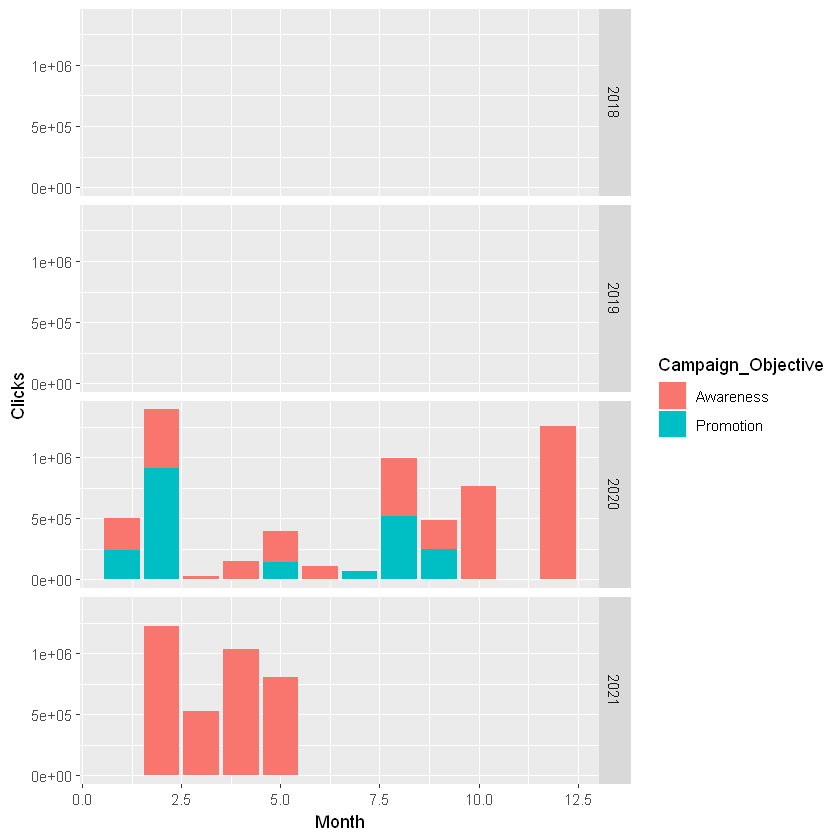

In [35]:
f <- ggplot(data = dig_media, aes(x=Month, y=Clicks, fill = Campaign_Objective))

 f + geom_bar(stat = 'identity' ) + facet_grid(Year~.)

In [36]:
library(dplyr)
b <- dig_media %>%
  group_by(Year, Month, Campaign_Objective, Platform, Type) %>%
  summarise(views = sum(Views, na.rm=TRUE), completed_views = sum(Completed_Views, na.rm=TRUE), Impressions = sum(Impressions, na.rm=TRUE), Engagement = sum(Engagement, na.rm=TRUE), Clicks = sum(Clicks, na.rm=TRUE), Spends = sum(Spends, na.rm=TRUE))

head(b)


Year,Month,Campaign_Objective,Platform,Type,views,completed_views,Impressions,Engagement,Clicks,Spends
2018,2,Promotion,SnapChat,Top Snap Only,474414,102222,2157384,0,0,2808.570
2018,3,Promotion,facebook,Video,23654301,5295753,112255134,23823852,0,130991.211
2018,3,Promotion,facebook,Video Carousel,58548,24588,1171638,62700,0,605.430
2018,3,Promotion,instagram,Video,8917563,1367286,38647815,9242565,0,94473.789
2018,3,Promotion,instagram,Video Carousel,9366,4308,187392,9663,0,105.180
2018,3,Promotion,Programmatic,Standard Banner,0,0,20637,45,0,103.185


In [37]:
dim(b)

[1] 294  11

In [38]:

b_new <- b[c('Year', 'Month', 'views', 'completed_views', 'Impressions', 'Engagement', 'Clicks', 'Spends')]

b_new['Campaign_Objective'] <- tolower(b$Campaign_Objective)
 
b_new['Platform'] <- tolower(b$Platform)

b_new['Type'] <- tolower(b$Type)

head(b_new)

Year,Month,views,completed_views,Impressions,Engagement,Clicks,Spends,Campaign_Objective,Platform,Type
2018,2,474414,102222,2157384,0,0,2808.570,promotion,snapchat,top snap only
2018,3,23654301,5295753,112255134,23823852,0,130991.211,promotion,facebook,video
2018,3,58548,24588,1171638,62700,0,605.430,promotion,facebook,video carousel
2018,3,8917563,1367286,38647815,9242565,0,94473.789,promotion,instagram,video
2018,3,9366,4308,187392,9663,0,105.180,promotion,instagram,video carousel
2018,3,0,0,20637,45,0,103.185,promotion,programmatic,standard banner


In [39]:
dim(b_new)

[1] 294  11

In [40]:
unique(b_new$Platform)

[1] "snapchat"               "facebook"               "instagram"             
 [4] "programmatic"           "resolution media"       "shahid.mbc.net"        
 [7] "tubemogul mena"         "twitter"                "youtube"               
[10] "anghami.com"            "koora.com"              "sport360.com"          
[13] "sports360.com"          "adintop.com"            "dms"                   
[16] "programmatic/adhunters" "programmatic/adintop"   "programmatic/blis"     
[19] "programmatic/dms"       "programmatic/mmp"       "programmatic/video opx"
[22] "programmatic/youtube"   "silver push"            "spotify"               
[25] "dv360"                  "adimo"                  "kooora.com"            
[28] "tiktok"

In [41]:
b_new$Platform[b_new$Platform == 'sport360.com'] <- 'sports360.com'



In [42]:
unique(b_new$Type)

[1] "top snap only"        "video"                "video carousel"      
 [4] "standard banner"      "promoted video views" "bumper"              
 [7] "truview"              "image post"           "rich media"          
[10] "awarness"             "audio"                "sponsorship"         
[13] "new_type"             "richmedia"            "display"             
[16] "youtube"              "hashtag challenge"

In [43]:
b_new$Type[b_new$Type == 'richmedia'] <- 'rich media'


In [44]:
unique(b_new$Type)

[1] "top snap only"        "video"                "video carousel"      
 [4] "standard banner"      "promoted video views" "bumper"              
 [7] "truview"              "image post"           "rich media"          
[10] "awarness"             "audio"                "sponsorship"         
[13] "new_type"             "display"              "youtube"             
[16] "hashtag challenge"

In [45]:
# verbose syntax
library(pivottabler)

pt_dig_media <- PivotTable$new()
pt_dig_media$addData(b_new) 

pt_dig_media$addColumnDataGroups("Campaign_Objective", addTotal=TRUE)
pt_dig_media$addColumnDataGroups("Platform", addTotal=TRUE)
pt_dig_media$addColumnDataGroups("Type", addTotal=TRUE)

pt_dig_media$addRowDataGroups("Year", header='Year', addTotal=FALSE)
pt_dig_media$addRowDataGroups("Month", header='Month', addTotal=FALSE)

pt_dig_media$defineCalculation(calculationName="views", summariseExpression="sum(views)")
pt_dig_media$defineCalculation(calculationName="completed_views", summariseExpression="sum(completed_views)")
pt_dig_media$defineCalculation(calculationName="Impressions", summariseExpression="sum(Impressions)")
pt_dig_media$defineCalculation(calculationName="Engagement", summariseExpression="sum(Engagement)")
pt_dig_media$defineCalculation(calculationName="Clicks", summariseExpression="sum(Clicks)")
pt_dig_media$defineCalculation(calculationName="Spends", summariseExpression="sum(Spends)")


pt_dig_media$renderPivot(showRowGroupHeaders=TRUE)


HTML widgets cannot be represented in plain text (need html)

In [46]:
month_dig <- pt_dig_media$asDataFrame(rowGroupsAsColumns=TRUE)
month_dig

,Year,Month,awareness adimo display views,awareness adimo display completed_views,awareness adimo display Impressions,awareness adimo display Engagement,awareness adimo display Clicks,awareness adimo display Spends,awareness adimo Total views,awareness adimo Total completed_views,...,promotion Total Impressions,promotion Total Engagement,promotion Total Clicks,promotion Total Spends,Total views,Total completed_views,Total Impressions,Total Engagement,Total Clicks,Total Spends
2018 2,2018,2,NA,NA,NA,NA,NA,NA,NA,NA,...,2157384,0,0,2808.57,474414,102222.0,2157384,0,0,2808.57
2018 3,2018,3,NA,NA,NA,NA,NA,NA,NA,NA,...,221973072,33529623,0,747358.36,61774029,25774483.6,221973072,33529623,0,747358.36
2018 4,2018,4,NA,NA,NA,NA,NA,NA,NA,NA,...,216255933,9868470,0,853006.24,66864690,37638613.0,216255933,9868470,0,853006.24
2018 5,2018,5,NA,NA,NA,NA,NA,NA,NA,NA,...,15879387,1402281,0,45376.06,2801142,802691.5,15879387,1402281,0,45376.06
2018 6,2018,6,NA,NA,NA,NA,NA,NA,NA,NA,...,100096371,8423886,0,601876.52,18822180,7488233.7,100096371,8423886,0,601876.52
2018 9,2018,9,NA,NA,NA,NA,NA,NA,NA,NA,...,30063381,3034887,0,38695.23,5639664,1036050.0,30063381,3034887,0,38695.23
2018 10,2018,10,NA,NA,NA,NA,NA,NA,NA,NA,...,38780832,0,0,45304.80,6049992,1545561.0,38780832,0,0,45304.80
2018 12,2018,12,NA,NA,NA,NA,NA,NA,NA,NA,...,91028592,3195003,0,501425.94,42907533,28945881.8,91028592,3195003,0,501425.94
2019 1,2019,1,NA,NA,NA,NA,NA,NA,NA,NA,...,171123531,6294483,0,492624.00,59116329,38869589.4,171123531,6294483,0,492624.00
2019 2,2019,2,NA,NA,NA,NA,NA,NA,NA,NA,...,274498329,5323008,0,467242.30,52189911,27094540.1,274498329,5323008,0,467242.30


In [47]:
dim(month_dig)

[1]  28 662

In [48]:
rownames(month_dig)

[1] "2018 2"  "2018 3"  "2018 4"  "2018 5"  "2018 6"  "2018 9"  "2018 10"
 [8] "2018 12" "2019 1"  "2019 2"  "2019 12" "2020 1"  "2020 2"  "2020 3" 
[15] "2020 4"  "2020 5"  "2020 6"  "2020 7"  "2020 8"  "2020 9"  "2020 10"
[22] "2020 11" "2020 12" "2021 1"  "2021 2"  "2021 3"  "2021 4"  "2021 5"

# OOH Data

In [49]:
media_ooh <- read_excel("Media_Data.xlsx", sheet=4)
head(media_ooh)

Brand,Year,Format,Month,Spends
B1,2017,Billboard,DEC,543613.80
B1,2017,Billboard,DEC,63027.69
B1,2018,Billboard,DEC,645237.24
B1,2018,Billboard,MAR,467140.08
B1,2018,Billboard,APR,604362.48
B1,2019,Megacom,DEC,1136490.00


In [50]:
colSums(is.na(media_ooh))

Brand   Year Format  Month Spends 
     0      0      0      0      0

In [51]:
unique(media_ooh$Format)

[1] "Billboard"     "Megacom"       "In Mall"       "LED Screen"   
 [5] "Mupi"          "Unipole"       "Giganto"       "Production"   
 [9] "Unipole LED"   "Bridge Banner"

In [52]:
unique(media_ooh$Month)

[1] "DEC" "MAR" "APR" "JUL" "NOV" "JAN" "FEB"

In [53]:
library(dplyr)
c <- media_ooh %>%
  group_by(Year, Month, Format) %>%
  summarise(spends = sum(Spends, na.rm=TRUE))

head(c)


Year,Month,Format,spends
2017,DEC,Billboard,606641.5
2018,APR,Billboard,604362.5
2018,DEC,Billboard,645237.2
2018,MAR,Billboard,467140.1
2019,DEC,In Mall,216921.5
2019,DEC,LED Screen,172389.9


In [54]:
dim(c)

[1] 30  4

In [55]:
library(reshape2)

month_ooh <- dcast(c, Year + Month ~ Format, value.var="spends", fun.aggregate=sum)
month_ooh

Year,Month,Billboard,Bridge Banner,Giganto,In Mall,LED Screen,Megacom,Mupi,Production,Unipole,Unipole LED
2017,DEC,606641.5,0.00,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2018,APR,604362.5,0.00,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2018,DEC,645237.2,0.00,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2018,MAR,467140.1,0.00,0.000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2019,DEC,0.0,0.00,0.000,216921.5,172389.9,1136490.0,0.0,0.00,0.0,0.0
2019,JAN,1334451.6,0.00,159574.468,319148.9,293058.5,574627.7,0.0,0.00,0.0,0.0
2019,JUL,0.0,0.00,0.000,316982.7,0.0,734281.9,0.0,0.00,0.0,0.0
2019,NOV,0.0,0.00,0.000,0.0,0.0,0.0,305186.2,0.00,239361.7,0.0
2020,FEB,0.0,0.00,3579.255,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020,JAN,0.0,0.00,530175.000,0.0,666023.9,3957287.6,0.0,67619.68,0.0,532180.9


In [56]:
dim(month_ooh)

[1] 12 12

# Macro data

In [57]:
macro <- read_excel("Macro_Data.xlsx", sheet=1)

head(macro)

MONTH_YEAR,Temp_City1,Temp_City2,Temp_City3,Temp_City4,Temp_City5,Oil_Prices,Gasoline_Prices,Inflation,CCI,...,total_confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,retail_and_recreation_mobility_index,grocery_and_pharmacy_mobility_index,residential_mobility_index,transit_stations_mobility_index,parks_mobility_index,workplaces_mobility_index
2018-01-01,20,27,27,22,22,63,2.025,3.0,95,...,0,0,0,0,0,0,0,0,0,0
2018-02-01,25,29,31,27,27,63,2.025,2.9,95,...,0,0,0,0,0,0,0,0,0,0
2018-03-01,30,30,34,32,32,63,2.025,2.8,95,...,0,0,0,0,0,0,0,0,0,0
2018-04-01,32,31,35,33,33,68,2.025,2.5,107,...,0,0,0,0,0,0,0,0,0,0
2018-05-01,37,35,39,38,38,68,2.025,2.3,107,...,0,0,0,0,0,0,0,0,0,0
2018-06-01,41,35,41,40,40,68,2.025,2.1,107,...,0,0,0,0,0,0,0,0,0,0


In [58]:
dim(macro)

[1] 41 23

In [59]:
str(macro)

Classes 'tbl_df', 'tbl' and 'data.frame':	41 obs. of  23 variables:
 $ MONTH_YEAR                          : POSIXct, format: "2018-01-01" "2018-02-01" ...
 $ Temp_City1                          : num  20 25 30 32 37 41 42 41 41 34 ...
 $ Temp_City2                          : num  27 29 30 31 35 35 36 36 34 35 ...
 $ Temp_City3                          : num  27 31 34 35 39 41 44 40 39 37 ...
 $ Temp_City4                          : num  22 27 32 33 38 40 40 41 41 34 ...
 $ Temp_City5                          : num  22 27 32 33 38 40 40 41 41 34 ...
 $ Oil_Prices                          : num  63 63 63 68 68 68 69 69 69 59 ...
 $ Gasoline_Prices                     : num  2.02 2.02 2.02 2.02 2.02 ...
 $ Inflation                           : num  3 2.9 2.8 2.5 2.3 2.1 2.2 2.2 2.1 2.4 ...
 $ CCI                                 : num  95 95 95 107 107 107 106 106 106 109 ...
 $ GDP                                 : num  1.38 1.38 1.38 1.58 1.58 1.58 2.45 2.45 2.45 4.26 ...
 $ Population 

In [60]:
month_macro = macro[c('MONTH_YEAR', 'Oil_Prices', 'CCI', 'total_confirmed_cases', 'stringency_index')]

month_macro['Temp'] = rowMeans(macro[,c(2,6)])

head(month_macro)

MONTH_YEAR,Oil_Prices,CCI,total_confirmed_cases,stringency_index,Temp
2018-01-01,63,95,0,0,21.0
2018-02-01,63,95,0,0,26.0
2018-03-01,63,95,0,0,31.0
2018-04-01,68,107,0,0,32.5
2018-05-01,68,107,0,0,37.5
2018-06-01,68,107,0,0,40.5


# Neilsen shipment data

In [61]:
shipment <- read_excel("Nielsen_Shipment Data.xlsx", sheet=1)

names(shipment)[names(shipment) == 'Internal_sum_d&a'] <- 'Internal_disc_a'

head(shipment)

MONTH_YEAR,CHANNEL,MONTH,YEAR,Comp1_NIELSEN_VALUE_SALES,Comp2_NIELSEN_VALUE_SALES,B1_NIELSEN_VALUE_SALES,Comp3_NIELSEN_VALUE_SALES,Comp4_NIELSEN_VALUE_SALES,Comp5_NIELSEN_VALUE_SALES,...,Comp3_NIELSEN_ABS_TDP_ND,Comp4_NIELSEN_ABS_TDP_ND,Comp5_NIELSEN_ABS_TDP_ND,Comp6_NIELSEN_ABS_TDP_ND,Internal_sum_volumeKg,Internal_sum_grossrev,Internal_sum_unitsales,Internal_disc_a,Corrected_Volume,Quarter
2018-01-01,MINIMARKET/SELF SERVICE,1,2018,5183.91,1143.30,26478.78,6092.04,1924.17,7086.36,...,309.6250,218.5143,536.4216,296.1548,972.2894,9033962,22920648,648990.0,835.1155,Q1
2018-02-01,MINIMARKET/SELF SERVICE,2,2018,4730.85,1260.51,24823.89,5997.33,1813.53,6862.89,...,330.6183,220.0108,565.5517,307.5383,975.7128,9106867,22458411,658636.7,774.1404,Q1
2018-03-01,MINIMARKET/SELF SERVICE,3,2018,5649.12,1550.31,29412.51,6374.76,2508.45,7440.15,...,294.5765,258.1316,542.7097,310.3569,806.2391,7766168,20122479,802615.3,925.5180,Q1
2018-04-01,MINIMARKET/SELF SERVICE,4,2018,5125.59,1269.12,30085.02,6170.61,2835.12,7692.12,...,274.2998,288.4993,543.3250,303.6793,870.8058,8338325,22222101,800926.3,947.0378,Q2
2018-05-01,MINIMARKET/SELF SERVICE,5,2018,5648.16,1378.26,31100.25,6744.51,3252.09,7999.50,...,296.7594,293.1946,556.0395,291.5473,676.1504,6623947,17720106,754330.3,952.1822,Q2
2018-06-01,MINIMARKET/SELF SERVICE,6,2018,4593.00,1277.94,25003.59,5605.20,2813.55,7590.30,...,315.4311,293.4360,565.1340,289.1364,778.6683,7422233,19655754,593277.5,766.2630,Q2


In [62]:
shipment['Avg_selling_price'] = shipment['B1_NIELSEN_VALUE_SALES'] / shipment['B1_NIELSEN_VOLUME_SALES']
shipment['Discount_percent'] = shipment['Internal_disc_a']/ shipment['Internal_sum_grossrev']


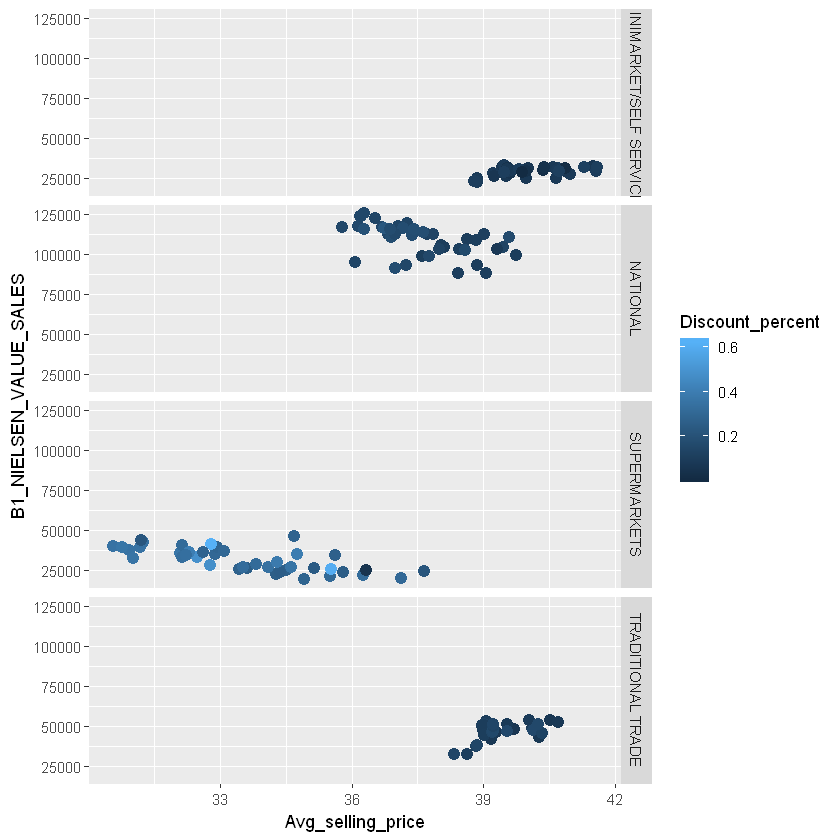

In [63]:
 
# ---- using facets

v <- ggplot(data = shipment, aes(x = Avg_selling_price, y=  B1_NIELSEN_VALUE_SALES, color = Discount_percent))

v + geom_point(size =3) + facet_grid((CHANNEL~.))
      

In [64]:
ship = shipment[c('MONTH_YEAR','YEAR', 'MONTH', 'CHANNEL', 'Avg_selling_price', 'Discount_percent', 'B1_NIELSEN_ABS_TDP_ND', 
                  'B1_NIELSEN_ABS_TDP_WD', 'B1_NIELSEN_ND', 'B1_NIELSEN_WD', 'Corrected_Volume')]

head(ship)

MONTH_YEAR,YEAR,MONTH,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,Corrected_Volume
2018-01-01,2018,1,MINIMARKET/SELF SERVICE,39.51923,0.07183892,1197.817,1485.939,93.4411,99.2707,835.1155
2018-02-01,2018,2,MINIMARKET/SELF SERVICE,39.96751,0.07232309,1159.026,1427.133,95.0123,99.3042,774.1404
2018-03-01,2018,3,MINIMARKET/SELF SERVICE,39.60994,0.10334766,1245.945,1534.842,95.6716,99.3408,925.5180
2018-04-01,2018,4,MINIMARKET/SELF SERVICE,39.59497,0.09605361,1258.732,1555.042,96.2691,99.5732,947.0378
2018-05-01,2018,5,MINIMARKET/SELF SERVICE,40.70997,0.11387929,1281.986,1577.628,95.7646,99.4477,952.1822
2018-06-01,2018,6,MINIMARKET/SELF SERVICE,40.67069,0.07993248,1232.130,1483.458,94.7312,99.3201,766.2630


In [65]:
names(ship)[names(ship) == 'YEAR'] <- 'Year'

names(ship)[names(ship) == 'MONTH'] <- 'Month'


In [236]:
df = merge(ship,month_tv, by= c('Year', 'Month'),  all.x = TRUE)

head(df)

Year,Month,MONTH_YEAR,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,sponsorship_sports_spends,sponsorship_sports_grp,sponsorship_youth_spends,sponsorship_youth_grp,sponsorship_Total_spends,sponsorship_Total_grp,Total_spends,Total_grp,as_grp,as_spends
2018,1,2018-01-01,MINIMARKET/SELF SERVICE,39.51923,0.07183892,1197.8169,1485.939,93.4411,99.2707,...,0,0,0,0,0,0,509158.7,2.085064,2.085064,509158.7361
2018,1,2018-01-01,SUPERMARKETS,37.13494,0.30657942,1745.7119,1876.192,98.5919,99.9903,...,0,0,0,0,0,0,509158.7,2.085064,2.085064,509158.7361
2018,1,2018-01-01,NATIONAL,38.86158,0.10470124,979.6539,1506.198,88.2747,99.2683,...,0,0,0,0,0,0,509158.7,2.085064,2.085064,509158.7361
2018,1,2018-01-01,TRADITIONAL TRADE,39.29161,0.07677612,1709.0011,2433.886,89.2726,99.0985,...,0,0,0,0,0,0,509158.7,2.085064,2.085064,509158.7361
2018,10,2018-10-01,TRADITIONAL TRADE,40.51325,0.07015858,1751.6324,2431.914,92.5415,98.6282,...,0,0,0,0,0,0,0.0,0.000000,1.551543,438.5023
2018,10,2018-10-01,NATIONAL,39.01418,0.11627738,1027.0377,1624.617,90.7861,99.3487,...,0,0,0,0,0,0,0.0,0.000000,1.551543,438.5023


In [66]:
df1 = merge(ship,month_ooh, by= c('Year', 'Month'),  all.x = TRUE)

head(df1)

Year,Month,MONTH_YEAR,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,Billboard,Bridge Banner,Giganto,In Mall,LED Screen,Megacom,Mupi,Production,Unipole,Unipole LED
2018,1,2018-01-01,MINIMARKET/SELF SERVICE,39.51923,0.07183892,1197.8169,1485.939,93.4411,99.2707,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,1,2018-01-01,SUPERMARKETS,37.13494,0.30657942,1745.7119,1876.192,98.5919,99.9903,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,1,2018-01-01,NATIONAL,38.86158,0.10470124,979.6539,1506.198,88.2747,99.2683,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,1,2018-01-01,TRADITIONAL TRADE,39.29161,0.07677612,1709.0011,2433.886,89.2726,99.0985,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,2,2018-02-01,MINIMARKET/SELF SERVICE,39.96751,0.07232309,1159.0257,1427.133,95.0123,99.3042,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,2,2018-02-01,SUPERMARKETS,35.50799,0.30728774,1751.8780,1878.786,100.0000,100.0000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [67]:
dim(df1)

[1] 164  21

In [68]:
df2 = merge(df1,month_dig, by= c('Year', 'Month'),  all.x = TRUE)

head(df2)

Year,Month,MONTH_YEAR,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,promotion Total Impressions,promotion Total Engagement,promotion Total Clicks,promotion Total Spends,Total views,Total completed_views,Total Impressions,Total Engagement,Total Clicks,Total Spends
2018,1,2018-01-01,MINIMARKET/SELF SERVICE,39.51923,0.07183892,1197.8169,1485.939,93.4411,99.2707,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,1,2018-01-01,SUPERMARKETS,37.13494,0.30657942,1745.7119,1876.192,98.5919,99.9903,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,1,2018-01-01,NATIONAL,38.86158,0.10470124,979.6539,1506.198,88.2747,99.2683,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,1,2018-01-01,TRADITIONAL TRADE,39.29161,0.07677612,1709.0011,2433.886,89.2726,99.0985,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018,2,2018-02-01,NATIONAL,38.42603,0.11226216,928.1955,1452.975,89.7091,99.1820,...,2157384,0,0,2808.57,474414,102222,2157384,0,0,2808.57
2018,2,2018-02-01,TRADITIONAL TRADE,39.17436,0.07899075,1594.1895,2260.825,91.4898,98.8824,...,2157384,0,0,2808.57,474414,102222,2157384,0,0,2808.57


In [69]:
dim(df2)

[1] 164 681

In [70]:
df3 = merge(df2,month_tv, by= c('Year', 'Month'),  all.x = TRUE)

head(df3)

Year,Month,MONTH_YEAR,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,sponsorship music spends,sponsorship music grp,sponsorship sports spends,sponsorship sports grp,sponsorship youth spends,sponsorship youth grp,sponsorship Total spends,sponsorship Total grp,Total spends,Total grp
2018,1,2018-01-01,TRADITIONAL TRADE,39.29161,0.07677612,1709.0011,2433.886,89.2726,99.0985,...,NA,NA,NA,NA,NA,NA,NA,NA,509158.7,4.074674
2018,1,2018-01-01,SUPERMARKETS,37.13494,0.30657942,1745.7119,1876.192,98.5919,99.9903,...,NA,NA,NA,NA,NA,NA,NA,NA,509158.7,4.074674
2018,1,2018-01-01,NATIONAL,38.86158,0.10470124,979.6539,1506.198,88.2747,99.2683,...,NA,NA,NA,NA,NA,NA,NA,NA,509158.7,4.074674
2018,1,2018-01-01,MINIMARKET/SELF SERVICE,39.51923,0.07183892,1197.8169,1485.939,93.4411,99.2707,...,NA,NA,NA,NA,NA,NA,NA,NA,509158.7,4.074674
2018,2,2018-02-01,MINIMARKET/SELF SERVICE,39.96751,0.07232309,1159.0257,1427.133,95.0123,99.3042,...,NA,NA,21734.59,4.061446,NA,NA,21734.59,4.061446,167309.6,8.233588
2018,2,2018-02-01,TRADITIONAL TRADE,39.17436,0.07899075,1594.1895,2260.825,91.4898,98.8824,...,NA,NA,21734.59,4.061446,NA,NA,21734.59,4.061446,167309.6,8.233588


In [71]:
dim(df3)

[1] 164 723

In [72]:
df4 = merge(df3,month_macro, by= "MONTH_YEAR",  all.x = TRUE)

head(df4)

MONTH_YEAR,Year,Month,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,sponsorship youth grp,sponsorship Total spends,sponsorship Total grp,Total spends,Total grp,Oil_Prices,CCI,total_confirmed_cases,stringency_index,Temp
2018-01-01,2018,1,TRADITIONAL TRADE,39.29161,0.07677612,1709.0011,2433.886,89.2726,99.0985,...,NA,NA,NA,509158.7,4.074674,63,95,0,0,21
2018-01-01,2018,1,SUPERMARKETS,37.13494,0.30657942,1745.7119,1876.192,98.5919,99.9903,...,NA,NA,NA,509158.7,4.074674,63,95,0,0,21
2018-01-01,2018,1,NATIONAL,38.86158,0.10470124,979.6539,1506.198,88.2747,99.2683,...,NA,NA,NA,509158.7,4.074674,63,95,0,0,21
2018-01-01,2018,1,MINIMARKET/SELF SERVICE,39.51923,0.07183892,1197.8169,1485.939,93.4411,99.2707,...,NA,NA,NA,509158.7,4.074674,63,95,0,0,21
2018-02-01,2018,2,MINIMARKET/SELF SERVICE,39.96751,0.07232309,1159.0257,1427.133,95.0123,99.3042,...,NA,21734.59,4.061446,167309.6,8.233588,63,95,0,0,26
2018-02-01,2018,2,TRADITIONAL TRADE,39.17436,0.07899075,1594.1895,2260.825,91.4898,98.8824,...,NA,21734.59,4.061446,167309.6,8.233588,63,95,0,0,26


In [73]:
dim(df4)

[1] 164 728

In [74]:
# Impute null values with 0

df4[is.na(df4)] <- 0


In [75]:
head(df4)

MONTH_YEAR,Year,Month,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,sponsorship youth grp,sponsorship Total spends,sponsorship Total grp,Total spends,Total grp,Oil_Prices,CCI,total_confirmed_cases,stringency_index,Temp
2018-01-01,2018,1,TRADITIONAL TRADE,39.29161,0.07677612,1709.0011,2433.886,89.2726,99.0985,...,0,0.00,0.000000,509158.7,4.074674,63,95,0,0,21
2018-01-01,2018,1,SUPERMARKETS,37.13494,0.30657942,1745.7119,1876.192,98.5919,99.9903,...,0,0.00,0.000000,509158.7,4.074674,63,95,0,0,21
2018-01-01,2018,1,NATIONAL,38.86158,0.10470124,979.6539,1506.198,88.2747,99.2683,...,0,0.00,0.000000,509158.7,4.074674,63,95,0,0,21
2018-01-01,2018,1,MINIMARKET/SELF SERVICE,39.51923,0.07183892,1197.8169,1485.939,93.4411,99.2707,...,0,0.00,0.000000,509158.7,4.074674,63,95,0,0,21
2018-02-01,2018,2,MINIMARKET/SELF SERVICE,39.96751,0.07232309,1159.0257,1427.133,95.0123,99.3042,...,0,21734.59,4.061446,167309.6,8.233588,63,95,0,0,26
2018-02-01,2018,2,TRADITIONAL TRADE,39.17436,0.07899075,1594.1895,2260.825,91.4898,98.8824,...,0,21734.59,4.061446,167309.6,8.233588,63,95,0,0,26


In [76]:
dim(df4)

[1] 164 728

In [82]:
write.csv(df4,"merged_data.csv", row.names = FALSE)


In [77]:
mini_market = subset(df4, df4$CHANNEL == "MINIMARKET/SELF SERVICE")

head(mini_market)

,MONTH_YEAR,Year,Month,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,sponsorship youth grp,sponsorship Total spends,sponsorship Total grp,Total spends,Total grp,Oil_Prices,CCI,total_confirmed_cases,stringency_index,Temp
4,2018-01-01,2018,1,MINIMARKET/SELF SERVICE,39.51923,0.07183892,1197.817,1485.939,93.4411,99.2707,...,0,0.000,0.000000,509158.7,4.074674,63,95,0,0,21.0
5,2018-02-01,2018,2,MINIMARKET/SELF SERVICE,39.96751,0.07232309,1159.026,1427.133,95.0123,99.3042,...,0,21734.585,4.061446,167309.6,8.233588,63,95,0,0,26.0
12,2018-03-01,2018,3,MINIMARKET/SELF SERVICE,39.60994,0.10334766,1245.945,1534.842,95.6716,99.3408,...,0,0.000,0.000000,1015164.0,25.667760,63,95,0,0,31.0
14,2018-04-01,2018,4,MINIMARKET/SELF SERVICE,39.59497,0.09605361,1258.732,1555.042,96.2691,99.5732,...,0,258987.094,23.630589,1289588.0,62.431035,68,107,0,0,32.5
18,2018-05-01,2018,5,MINIMARKET/SELF SERVICE,40.70997,0.11387929,1281.986,1577.628,95.7646,99.4477,...,0,268003.107,19.025659,577394.8,44.271940,68,107,0,0,37.5
24,2018-06-01,2018,6,MINIMARKET/SELF SERVICE,40.67069,0.07993248,1232.130,1483.458,94.7312,99.3201,...,0,1001.232,3.564815,2379346.6,14.954372,68,107,0,0,40.5


In [78]:
super_market = subset(df4, df4$CHANNEL == "SUPERMARKETS")

head(super_market)

,MONTH_YEAR,Year,Month,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,sponsorship youth grp,sponsorship Total spends,sponsorship Total grp,Total spends,Total grp,Oil_Prices,CCI,total_confirmed_cases,stringency_index,Temp
2,2018-01-01,2018,1,SUPERMARKETS,37.13494,0.3065794,1745.712,1876.192,98.5919,99.9903,...,0,0.000,0.000000,509158.7,4.074674,63,95,0,0,21.0
7,2018-02-01,2018,2,SUPERMARKETS,35.50799,0.3072877,1751.878,1878.786,100.0000,100.0000,...,0,21734.585,4.061446,167309.6,8.233588,63,95,0,0,26.0
9,2018-03-01,2018,3,SUPERMARKETS,35.81099,0.2527888,1903.123,2046.542,100.0000,100.0000,...,0,0.000,0.000000,1015164.0,25.667760,63,95,0,0,31.0
16,2018-04-01,2018,4,SUPERMARKETS,34.50596,0.2706684,1965.440,2090.069,100.0000,100.0000,...,0,258987.094,23.630589,1289588.0,62.431035,68,107,0,0,32.5
17,2018-05-01,2018,5,SUPERMARKETS,36.26805,0.3211792,1956.018,2078.128,100.0000,100.0000,...,0,268003.107,19.025659,577394.8,44.271940,68,107,0,0,37.5
21,2018-06-01,2018,6,SUPERMARKETS,34.91255,0.2839599,1938.154,2000.122,100.0000,100.0000,...,0,1001.232,3.564815,2379346.6,14.954372,68,107,0,0,40.5


In [79]:
national = subset(df4, df4$CHANNEL == "NATIONAL")

head(national)

,MONTH_YEAR,Year,Month,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,sponsorship youth grp,sponsorship Total spends,sponsorship Total grp,Total spends,Total grp,Oil_Prices,CCI,total_confirmed_cases,stringency_index,Temp
3,2018-01-01,2018,1,NATIONAL,38.86158,0.1047012,979.6539,1506.198,88.2747,99.2683,...,0,0.000,0.000000,509158.7,4.074674,63,95,0,0,21.0
8,2018-02-01,2018,2,NATIONAL,38.42603,0.1122622,928.1955,1452.975,89.7091,99.1820,...,0,21734.585,4.061446,167309.6,8.233588,63,95,0,0,26.0
10,2018-03-01,2018,3,NATIONAL,38.44085,0.1122354,989.4197,1560.674,89.6840,99.1759,...,0,0.000,0.000000,1015164.0,25.667760,63,95,0,0,31.0
13,2018-04-01,2018,4,NATIONAL,38.03426,0.1035930,1005.5566,1595.052,90.0458,99.2522,...,0,258987.094,23.630589,1289588.0,62.431035,68,107,0,0,32.5
19,2018-05-01,2018,5,NATIONAL,39.44110,0.1345373,1031.5425,1605.810,89.5371,99.2006,...,0,268003.107,19.025659,577394.8,44.271940,68,107,0,0,37.5
22,2018-06-01,2018,6,NATIONAL,39.05821,0.1124960,989.1157,1523.892,89.2956,99.0490,...,0,1001.232,3.564815,2379346.6,14.954372,68,107,0,0,40.5


In [80]:
traditional_trade = subset(df4, df4$CHANNEL == "TRADITIONAL TRADE")

head(traditional_trade)

,MONTH_YEAR,Year,Month,CHANNEL,Avg_selling_price,Discount_percent,B1_NIELSEN_ABS_TDP_ND,B1_NIELSEN_ABS_TDP_WD,B1_NIELSEN_ND,B1_NIELSEN_WD,...,sponsorship youth grp,sponsorship Total spends,sponsorship Total grp,Total spends,Total grp,Oil_Prices,CCI,total_confirmed_cases,stringency_index,Temp
1,2018-01-01,2018,1,TRADITIONAL TRADE,39.29161,0.07677612,1709.001,2433.886,89.2726,99.0985,...,0,0.000,0.000000,509158.7,4.074674,63,95,0,0,21.0
6,2018-02-01,2018,2,TRADITIONAL TRADE,39.17436,0.07899075,1594.189,2260.825,91.4898,98.8824,...,0,21734.585,4.061446,167309.6,8.233588,63,95,0,0,26.0
11,2018-03-01,2018,3,TRADITIONAL TRADE,39.11982,0.06889961,1686.212,2427.196,91.7270,98.9813,...,0,0.000,0.000000,1015164.0,25.667760,63,95,0,0,31.0
15,2018-04-01,2018,4,TRADITIONAL TRADE,39.11844,0.06503951,1701.764,2468.192,91.7798,98.9509,...,0,258987.094,23.630589,1289588.0,62.431035,68,107,0,0,32.5
20,2018-05-01,2018,5,TRADITIONAL TRADE,40.20792,0.09279205,1747.459,2488.052,90.8495,98.9439,...,0,268003.107,19.025659,577394.8,44.271940,68,107,0,0,37.5
23,2018-06-01,2018,6,TRADITIONAL TRADE,40.27856,0.07456964,1689.872,2408.364,89.9434,98.2505,...,0,1001.232,3.564815,2379346.6,14.954372,68,107,0,0,40.5
